In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("Churn Modeling.csv")
print(df.head())
print("Veri kümesinin boyutu:", df.shape)
print("Sınıf dağılımı:\n", df['Exited'].value_counts())
print(df.describe())
print(df.isnull().sum())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

ReLU + Sigmoid Output
Training time: 1.9668002128601074 seconds
Accuracy: 0.8025


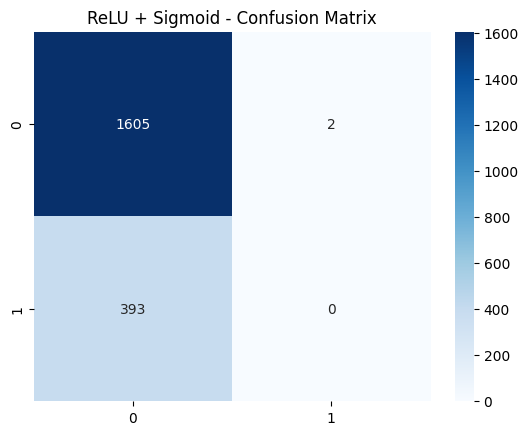

Confusion Matrix:
 [[1605    2]
 [ 393    0]]
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


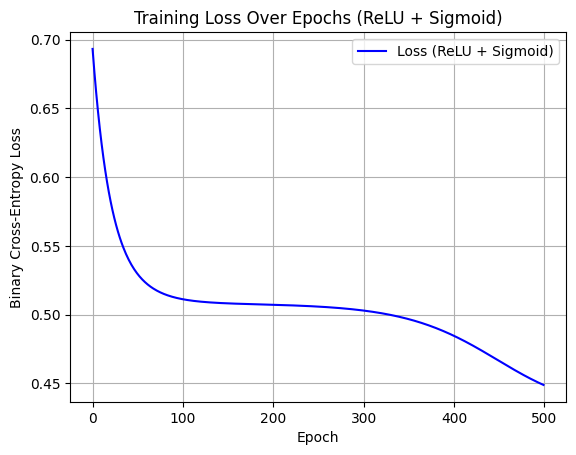

Sigmoid + Sigmoid Output
Training time: 3.3787338733673096 seconds
Accuracy: 0.8035


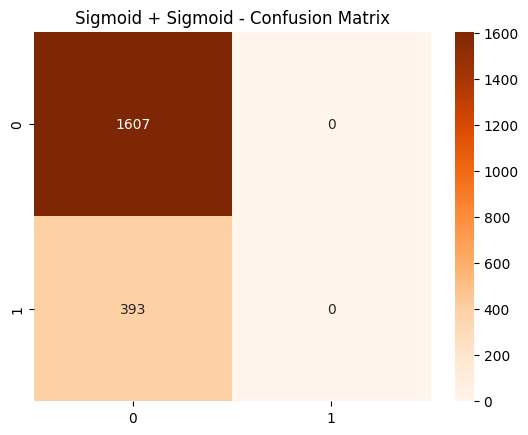

Confusion Matrix:
 [[1607    0]
 [ 393    0]]
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


C:\Users\gorke\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


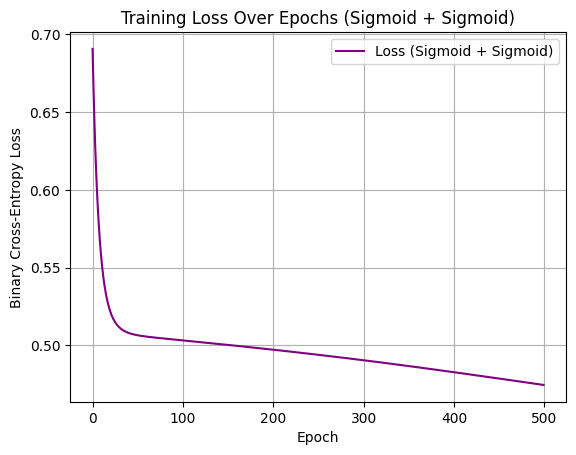

Tanh + Sigmoid Output
Training time: 7.814468145370483 seconds
Accuracy: 0.812


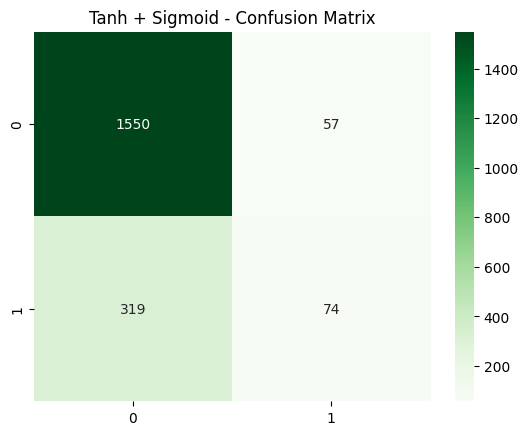

Confusion Matrix:
 [[1550   57]
 [ 319   74]]
Precision: 0.5649
Recall: 0.1883
F1-Score: 0.2824


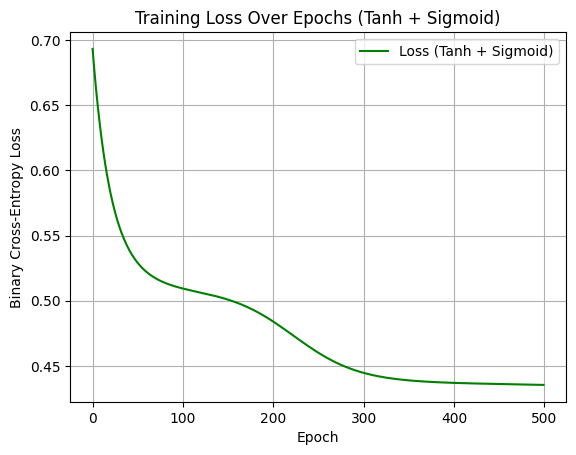

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import time
import seaborn as sns

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def sigmoid_turev(z):
    s = sigmoid(z)
    return s * (1 - s)
def relu(z):
    return np.maximum(0, z)
def relu_turev(z):
    return (z > 0).astype(float)

def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-8
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, lr=0.01, activation='relu'):
        self.lr = lr
        self.activation_name = activation
        self.W1 = np.random.randn(input_dim, hidden_dim) * 0.01
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, 1) * 0.01
        self.b2 = np.zeros((1, 1))
        
        if activation == 'relu':
            self.activation = relu
            self.activation_turev = relu_turev
        elif activation == 'tanh':
            self.activation = np.tanh
            self.activation_turev = lambda z: 1 - np.tanh(z)**2
        else:
            self.activation = sigmoid#gpt nin önerisi
            self.activation_turev = sigmoid_turev

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.activation(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2

    def backward(self, X, y, output):
        m = X.shape[0]
        dZ2 = output - y
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.activation_turev(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self, X, y, epochs=500):
        loss_history = []
        for i in range(epochs):
            output = self.forward(X)
            loss = binary_cross_entropy(y, output)
            loss_history.append(loss)
            self.backward(X, y, output)
        return loss_history

    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int)

X = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 
        'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']].copy()
y = df['Exited'].values.reshape(-1, 1)
X.loc[:, 'Geography'] = LabelEncoder().fit_transform(X['Geography'])
X.loc[:, 'Gender'] = LabelEncoder().fit_transform(X['Gender'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#ReLU
nn_relu = NeuralNetwork(input_dim=10, hidden_dim=8, lr=0.1, activation='relu')
start_time = time.time()
losses_relu = nn_relu.train(X_train, y_train, epochs=500)
elapsed_time_relu = time.time() - start_time
y_pred_relu = nn_relu.predict(X_test)
print("ReLU + Sigmoid Output")
print("Training time:", elapsed_time_relu, "seconds")
print("Accuracy:", accuracy_score(y_test, y_pred_relu))
sns.heatmap(confusion_matrix(y_test, y_pred_relu), annot=True, fmt="d", cmap='Blues')
plt.title('ReLU + Sigmoid - Confusion Matrix')
plt.show()
cm_relu = confusion_matrix(y_test, y_pred_relu)
print("Confusion Matrix:\n", cm_relu)
precision_relu = precision_score(y_test, y_pred_relu)
recall_relu = recall_score(y_test, y_pred_relu)
f1_relu = f1_score(y_test, y_pred_relu)
print(f"Precision: {precision_relu:.4f}")
print(f"Recall: {recall_relu:.4f}")
print(f"F1-Score: {f1_relu:.4f}")

plt.plot(losses_relu, label='Loss (ReLU + Sigmoid)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Training Loss Over Epochs (ReLU + Sigmoid)')
plt.legend()
plt.grid(True)
plt.show()

#Sigmoid
nn_sigmoid = NeuralNetwork(input_dim=10, hidden_dim=8, lr=0.1, activation='sigmoid')
start_time = time.time()
losses_sigmoid = nn_sigmoid.train(X_train, y_train, epochs=500)
elapsed_time_sigmoid = time.time() - start_time
y_pred_sigmoid = nn_sigmoid.predict(X_test)
print("Sigmoid + Sigmoid Output")
print("Training time:", elapsed_time_sigmoid, "seconds")
print("Accuracy:", accuracy_score(y_test, y_pred_sigmoid))
sns.heatmap(confusion_matrix(y_test, y_pred_sigmoid), annot=True, fmt="d", cmap='Oranges')
plt.title('Sigmoid + Sigmoid - Confusion Matrix')
plt.show()
cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
print("Confusion Matrix:\n", cm_sigmoid)
precision_sigmoid = precision_score(y_test, y_pred_sigmoid)
recall_sigmoid = recall_score(y_test, y_pred_sigmoid)
f1_sigmoid = f1_score(y_test, y_pred_sigmoid)
print(f"Precision: {precision_sigmoid:.4f}")
print(f"Recall: {recall_sigmoid:.4f}")
print(f"F1-Score: {f1_sigmoid:.4f}")

plt.plot(losses_sigmoid, label='Loss (Sigmoid + Sigmoid)', color='purple')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Training Loss Over Epochs (Sigmoid + Sigmoid)')
plt.legend()
plt.grid(True)
plt.show()

#Tanh
nn_tanh = NeuralNetwork(input_dim=10, hidden_dim=8, lr=0.1, activation='tanh')
start_time = time.time()
losses_tanh = nn_tanh.train(X_train, y_train, epochs=500)
elapsed_time_tanh = time.time() - start_time
y_pred_tanh = nn_tanh.predict(X_test)
print("Tanh + Sigmoid Output")
print("Training time:", elapsed_time_tanh, "seconds")
print("Accuracy:", accuracy_score(y_test, y_pred_tanh))
sns.heatmap(confusion_matrix(y_test, y_pred_tanh), annot=True, fmt="d", cmap='Greens')
plt.title('Tanh + Sigmoid - Confusion Matrix')
plt.show()
cm_tanh = confusion_matrix(y_test, y_pred_tanh)
print("Confusion Matrix:\n", cm_tanh)
precision_tanh = precision_score(y_test, y_pred_tanh)
recall_tanh = recall_score(y_test, y_pred_tanh)
f1_tanh = f1_score(y_test, y_pred_tanh)
print(f"Precision: {precision_tanh:.4f}")
print(f"Recall: {recall_tanh:.4f}")
print(f"F1-Score: {f1_tanh:.4f}")

plt.plot(losses_tanh, label='Loss (Tanh + Sigmoid)', color='green')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Training Loss Over Epochs (Tanh + Sigmoid)')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
print("Pozitif sınıf oranı (train):", np.mean(y_train))
print("Pozitif sınıf oranı (test):", np.mean(y_test))


Pozitif sınıf oranı (train): 0.2055
Pozitif sınıf oranı (test): 0.1965


ReLU + Sigmoid Output with threshold=0.3
Training time: 1.7698137760162354 seconds
Accuracy: 0.7965
Confusion Matrix:
 [[1407  200]
 [ 207  186]]


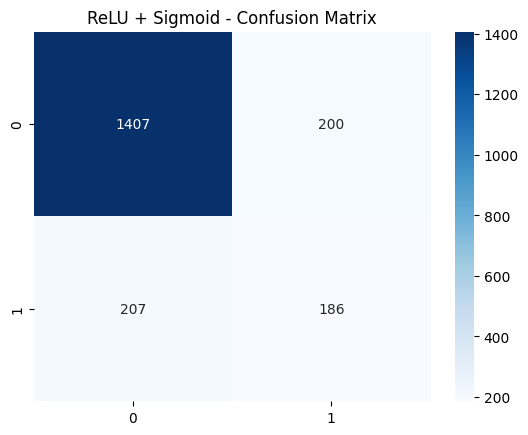

Precision: 0.4819
Recall: 0.4733
F1-Score: 0.4775

Sigmoid + Sigmoid Output with threshold=0.3
Training time: 3.304520845413208 seconds
Accuracy: 0.776
Confusion Matrix:
 [[1337  270]
 [ 178  215]]


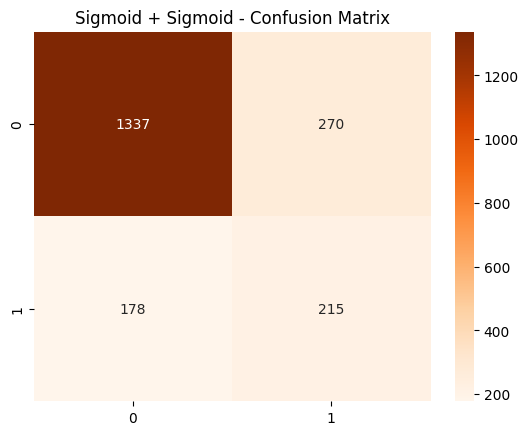

Precision: 0.4433
Recall: 0.5471
F1-Score: 0.4897

Tanh + Sigmoid Output with threshold=0.3
Training time: 7.461421966552734 seconds
Accuracy: 0.8085
Confusion Matrix:
 [[1468  139]
 [ 244  149]]


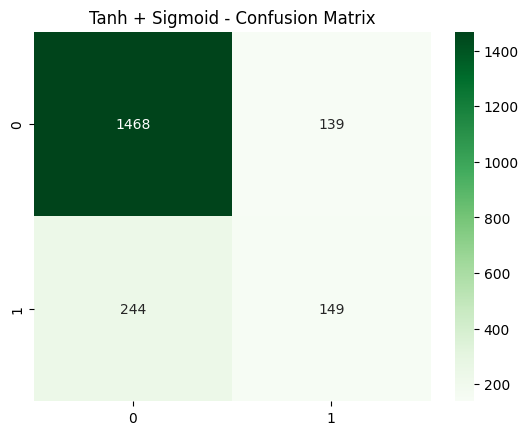

Precision: 0.5174
Recall: 0.3791
F1-Score: 0.4376

Final Loss (ReLU): 0.4019
Final Loss (Sigmoid): 0.4441
Final Loss (Tanh): 0.4202
     Epoch      ReLU   Sigmoid      Tanh
495    496  0.402305  0.444223  0.420328
496    497  0.402211  0.444192  0.420300
497    498  0.402118  0.444161  0.420271
498    499  0.402025  0.444131  0.420243
499    500  0.401933  0.444100  0.420215


In [4]:
def predict_with_threshold(nn, X, threshold=0.5):
    output = nn.forward(X)
    return (output > threshold).astype(int)

# Örnek: ReLU modeli için eşik 0.3
y_pred_relu = predict_with_threshold(nn_relu, X_test, threshold=0.3)
start_time = time.time()
losses_relu = nn_relu.train(X_train, y_train, epochs=500)
elapsed_time_relu = time.time() - start_time
print("ReLU + Sigmoid Output with threshold=0.3")
print("Training time:", elapsed_time_relu, "seconds")
print("Accuracy:", accuracy_score(y_test, y_pred_relu))
cm_relu = confusion_matrix(y_test, y_pred_relu)
print("Confusion Matrix:\n", cm_relu)
sns.heatmap(confusion_matrix(y_test, y_pred_relu), annot=True, fmt="d", cmap='Blues')
plt.title('ReLU + Sigmoid - Confusion Matrix')
plt.show()
precision_relu = precision_score(y_test, y_pred_relu)
recall_relu = recall_score(y_test, y_pred_relu)
f1_relu = f1_score(y_test, y_pred_relu)
print(f"Precision: {precision_relu:.4f}")
print(f"Recall: {recall_relu:.4f}")
print(f"F1-Score: {f1_relu:.4f}\n")

# Sigmoid modeli için eşik 0.22
y_pred_sigmoid = predict_with_threshold(nn_sigmoid, X_test, threshold=0.22)
start_time = time.time()
losses_sigmoid = nn_sigmoid.train(X_train, y_train, epochs=500)
elapsed_time_sigmoid = time.time() - start_time
print("Sigmoid + Sigmoid Output with threshold=0.3")
print("Training time:", elapsed_time_sigmoid, "seconds")
print("Accuracy:", accuracy_score(y_test, y_pred_sigmoid))
cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
print("Confusion Matrix:\n", cm_sigmoid)
sns.heatmap(confusion_matrix(y_test, y_pred_sigmoid), annot=True, fmt="d", cmap='Oranges')
plt.title('Sigmoid + Sigmoid - Confusion Matrix')
plt.show()
precision_sigmoid = precision_score(y_test, y_pred_sigmoid)
recall_sigmoid = recall_score(y_test, y_pred_sigmoid)
f1_sigmoid = f1_score(y_test, y_pred_sigmoid)
print(f"Precision: {precision_sigmoid:.4f}")
print(f"Recall: {recall_sigmoid:.4f}")
print(f"F1-Score: {f1_sigmoid:.4f}\n")

#Tanh modeli için eşik 0.4
y_pred_tanh = predict_with_threshold(nn_tanh, X_test, threshold=0.4)
start_time = time.time()
losses_tanh = nn_tanh.train(X_train, y_train, epochs=500)
elapsed_time_tanh = time.time() - start_time
print("Tanh + Sigmoid Output with threshold=0.3")
print("Training time:", elapsed_time_tanh, "seconds")
print("Accuracy:", accuracy_score(y_test, y_pred_tanh))
cm_tanh = confusion_matrix(y_test, y_pred_tanh)
print("Confusion Matrix:\n", cm_tanh)
sns.heatmap(confusion_matrix(y_test, y_pred_tanh), annot=True, fmt="d", cmap='Greens')
plt.title('Tanh + Sigmoid - Confusion Matrix')
plt.show()
precision_tanh = precision_score(y_test, y_pred_tanh)
recall_tanh = recall_score(y_test, y_pred_tanh)
f1_tanh = f1_score(y_test, y_pred_tanh)
print(f"Precision: {precision_tanh:.4f}")
print(f"Recall: {recall_tanh:.4f}")
print(f"F1-Score: {f1_tanh:.4f}\n")


print(f"Final Loss (ReLU): {losses_relu[-1]:.4f}")
print(f"Final Loss (Sigmoid): {losses_sigmoid[-1]:.4f}")
print(f"Final Loss (Tanh): {losses_tanh[-1]:.4f}")
loss_df = pd.DataFrame({
    'Epoch': range(1, len(losses_relu)+1),
    'ReLU': losses_relu,
    'Sigmoid': losses_sigmoid,
    'Tanh': losses_tanh
})
print(loss_df.tail())  #son 5 epoch
